[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gawad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gawad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Dataset Size: 61121 rows
Unique Sentiments: 0.0    22358
1.0    20655
2.0    18108
Name: Sentiment, dtype: int64
Training Set: 48896 samples
Testing Set: 12225 samples
Accuracy: 79.09%
              precision    recall  f1-score   support

         0.0       0.74      0.91      0.81      4472
         1.0       0.80      0.82      0.81      4131
         2.0       0.90      0.61      0.73      3622

    accuracy                           0.79     12225
   macro avg       0.81      0.78      0.78     12225
weighted avg       0.81      0.79      0.79     12225



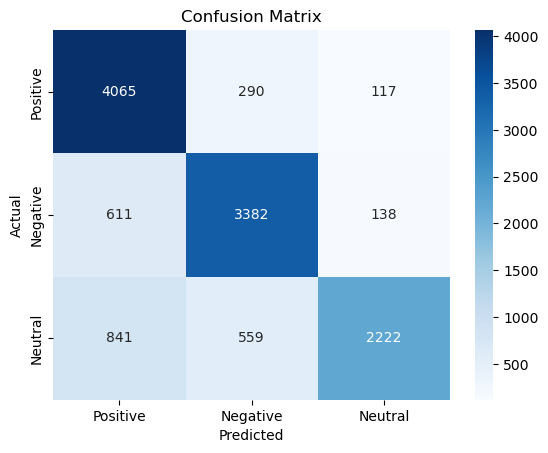

Insights:
1. The accuracy score shows how well the model predicts sentiment from text.
2. The classification report highlights precision, recall, and F1-score for each class.
3. The confusion matrix reveals common misclassifications, helping in further model tuning.


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df_train = pd.read_csv("twitter_training.csv", header=None)
df_valid = pd.read_csv("twitter_validation.csv", header=None)

df_train.columns = ['ID', 'Entity', 'Sentiment', 'Text']
df_valid.columns = ['ID', 'Entity', 'Sentiment', 'Text']

df_train = df_train[['Sentiment', 'Text']]
df_valid = df_valid[['Sentiment', 'Text']]

sentiment_mapping = {'Positive': 1, 'Negative': 0, 'Neutral': 2}
df_train['Sentiment'] = df_train['Sentiment'].map(sentiment_mapping)
df_valid['Sentiment'] = df_valid['Sentiment'].map(sentiment_mapping)

df_train.dropna(subset=['Sentiment', 'Text'], inplace=True)
df_valid.dropna(subset=['Sentiment', 'Text'], inplace=True)

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z0-9 ]', '', text)  # Remove special characters
    text = text.strip()
    return text

df_train['Text'] = df_train['Text'].apply(clean_text)
df_valid['Text'] = df_valid['Text'].apply(clean_text)

nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df_train['Text'] = df_train['Text'].apply(preprocess_text)
df_valid['Text'] = df_valid['Text'].apply(preprocess_text)

X = df_train['Text']
y = df_train['Sentiment']

print(f"Dataset Size: {len(df_train)} rows")
print(f"Unique Sentiments: {df_train['Sentiment'].value_counts()}")

if len(X) == 0 or len(y) == 0:
    raise ValueError("Error: No data available after preprocessing. Check dataset cleaning.")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f'Training Set: {len(X_train)} samples')
print(f'Testing Set: {len(X_test)} samples')

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sentiment_mapping.keys(), yticklabels=sentiment_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Insights:")
print("1. The accuracy score shows how well the model predicts sentiment from text.")
print("2. The classification report highlights precision, recall, and F1-score for each class.")
print("3. The confusion matrix reveals common misclassifications, helping in further model tuning.")
